In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("daily_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('volume') - pl.col('taker_buy_volume')).alias('taker_sell_volume'),
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

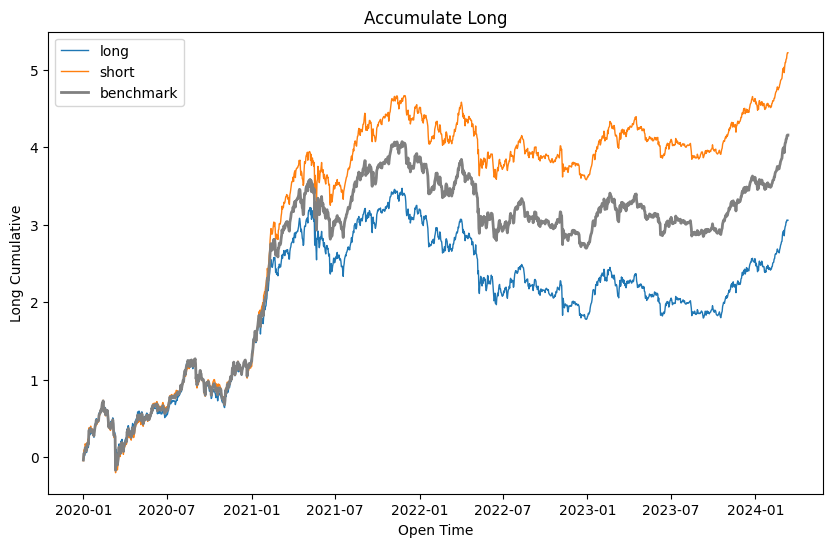

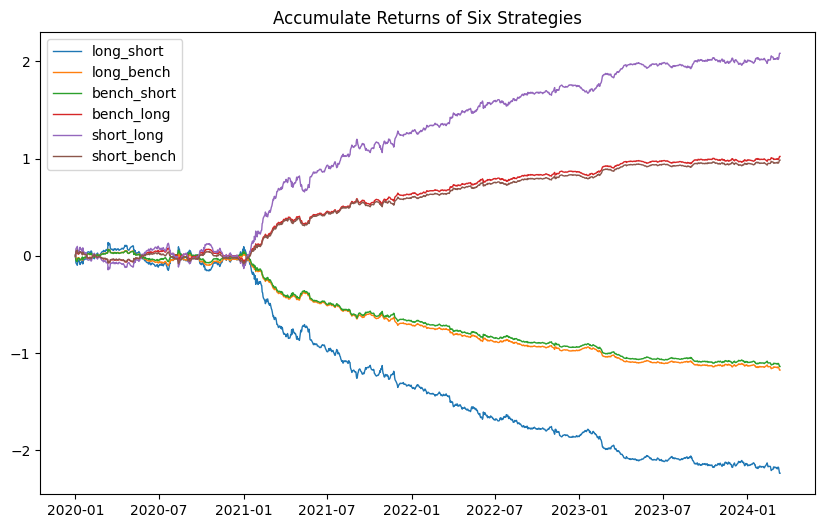

long: 
ann_return = 17.4678  sharpe = 3.8242  maxdd = 0.4968  calmar_ratio = 35.1603  

short: 
ann_return = 29.8076  sharpe = 6.4202  maxdd = 0.5378  calmar_ratio = 55.4245  

bench: 
ann_return = 23.7448  sharpe = 5.2089  maxdd = 0.5174  calmar_ratio = 45.8928  

long_short: 
ann_return = -12.7778  sharpe = -10.0155  maxdd = 2.0875  calmar_ratio = -6.1212  

long_bench: 
ann_return = -6.715  sharpe = -10.5604  maxdd = 1.1639  calmar_ratio = -5.7693  

bench_long: 
ann_return = 5.839  sharpe = 9.1828  maxdd = 0.1337  calmar_ratio = 43.6606  

short_long: 
ann_return = 11.9018  sharpe = 9.3289  maxdd = 0.2302  calmar_ratio = 51.7097  

short_bench: 
ann_return = 5.6248  sharpe = 8.6949  maxdd = 0.1352  calmar_ratio = 41.6102  

bench_short: 
ann_return = -6.5008  sharpe = -10.049  maxdd = 1.1293  calmar_ratio = -5.7567  



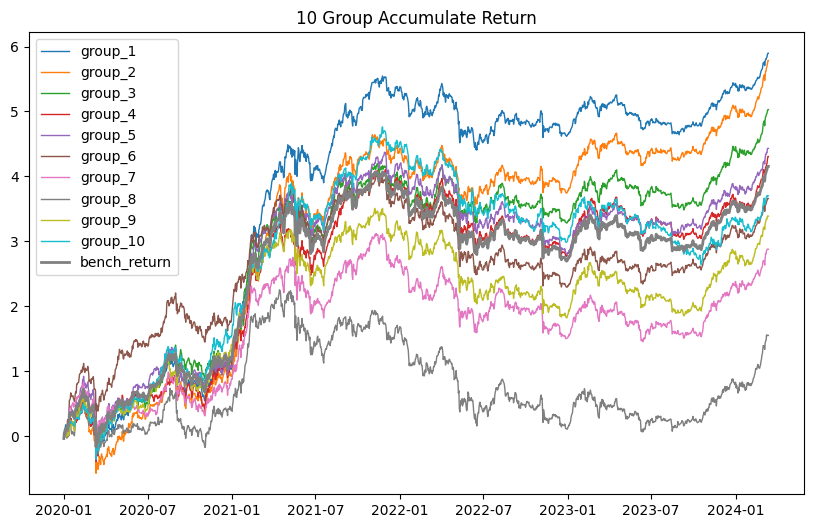

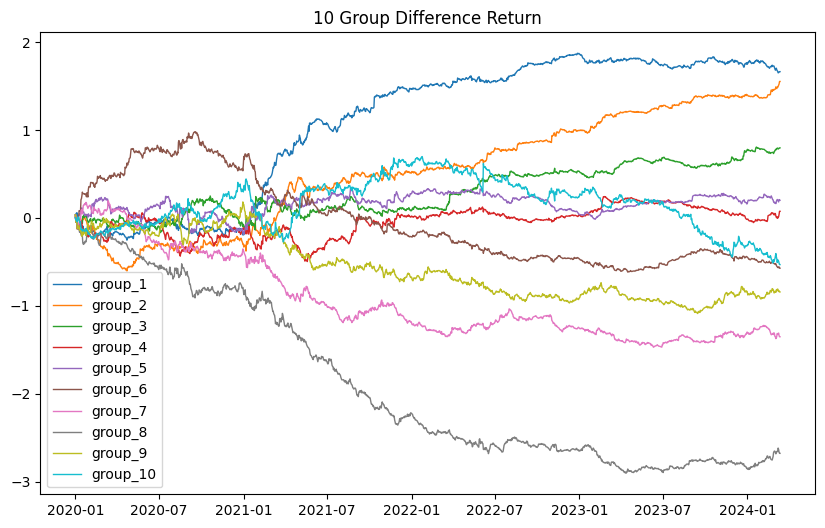

group_1: 
ann_return = 33.6903  sharpe = 7.3381  maxdd = 0.5476  calmar_ratio = 61.5292  

group_2: 
ann_return = 33.0517  sharpe = 6.8487  maxdd = 0.7234  calmar_ratio = 45.6899  

group_3: 
ann_return = 28.7349  sharpe = 5.8292  maxdd = 0.5548  calmar_ratio = 51.7891  

group_4: 
ann_return = 24.6107  sharpe = 5.1275  maxdd = 0.6048  calmar_ratio = 40.6916  

group_5: 
ann_return = 25.3225  sharpe = 5.2225  maxdd = 0.4651  calmar_ratio = 54.4417  

group_6: 
ann_return = 20.9081  sharpe = 4.348  maxdd = 0.4004  calmar_ratio = 52.2191  

group_7: 
ann_return = 16.4514  sharpe = 3.4028  maxdd = 0.4793  calmar_ratio = 34.3235  

group_8: 
ann_return = 8.8706  sharpe = 1.8413  maxdd = 0.6725  calmar_ratio = 13.1906  

group_9: 
ann_return = 19.3649  sharpe = 3.994  maxdd = 0.5123  calmar_ratio = 37.7997  

group_10: 
ann_return = 21.1444  sharpe = 4.3899  maxdd = 0.5612  calmar_ratio = 37.6762  

-----------------------------------------
group_difference_1: 
ann_return = 9.5075  sharpe =

In [2]:
factors = df.select(['open_time', 'symbol', 'quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()